In [1]:
import torch.nn as nn
import torch
import torchvision
import numpy as np

/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
from mmseg.models import SegmenterMaskTransformerHead
import mmcv

/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [4]:
encoder_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
encoder = torchvision.models.vit_b_16(encoder_weights)

/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


# so we will use mask transformer for decoder

In [5]:
import mmseg
from mmseg.models import SegmenterMaskTransformerHead
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [6]:
config_file = "./mmsegmentation/configs/segmenter/segmenter_vit-l_mask_8x1_640x640_160k_ade20k.py"
cp_path = "../seg_model/cp_seg_v_l_16/vit_large_p16_384_20220308-d4efb41d.pth"

In [7]:
model = init_segmentor(config=config_file, device=device)

/home/emir/Desktop/dev/myResearch/src/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


In [8]:
from mmseg.datasets.ade import ADE20KDataset
img_dir = "../dataset/Ade20K/"

In [9]:
img = "../dataset/Ade20K/release_test/testing/ADE_test_00000001.jpg"
results = inference_segmentor(model=model, imgs=img)

In [10]:
type(model)

mmseg.models.segmentors.encoder_decoder.EncoderDecoder

/home/emir/Desktop/dev/myResearch/src/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


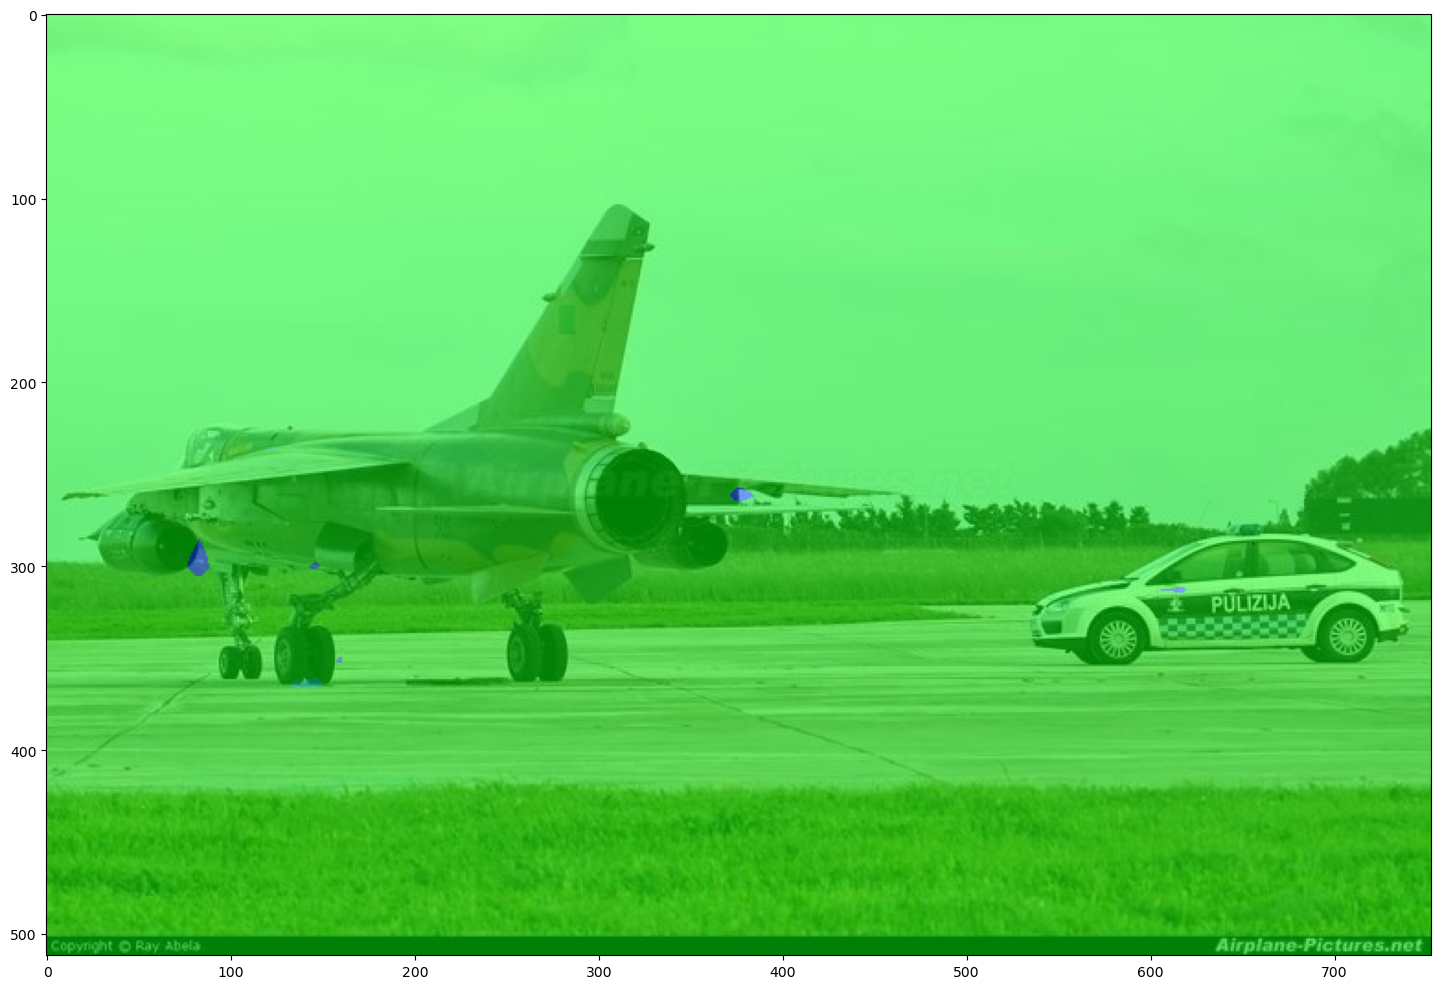

In [11]:
show_result_pyplot(model, img, results, get_palette('ade20k'))